<a href="https://colab.research.google.com/github/LQDJerry/MachLearn/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries as needed 

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import os
from sklearn.decomposition import PCA
from sklearn import datasets

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Loading the dataset into colab

In [59]:
mnist = pd.read_csv("https://github.com/LQDJerry/MachLearn/raw/main/data/train.zip")
data = mnist.values
print(data.shape)
print (data[1,1:])

(42000, 785)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0  18  30 137 137
 192  86  72   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  13  86 250 254 254 254 254 217 246 151  32   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0  16 179 254 254 254
 254 254 254 254 254 254 231  54  15   0   0   0   0   0   0   0   0   0
   0   0   0   0   0  72 254 254 254 254 254 254 254 254 254 254 254 254
 104   0   0   0   0   0   0   0   0   0   0   0   0   0  61 191 254 254
 254 254 254 109  83 199 254 254 254 2

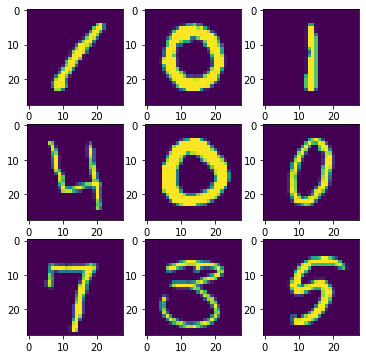

In [60]:
plt.figure(figsize=(6,6))

for i in range(9):
    img = np.asarray(mnist.iloc[i,1:].values.reshape((28,28))/255);
    ax=plt.subplot(3, 3, i+1)
    plt.imshow(img)
    
plt.show()

[0 0 0 0 0]


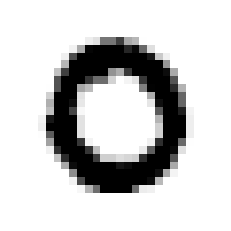

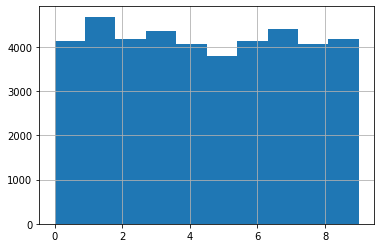

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


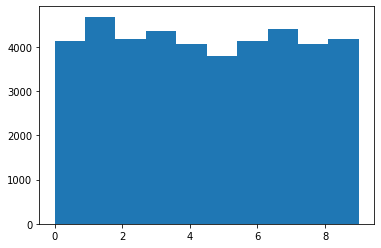

In [61]:
# print one number
myNumber = data[1,1:]
print (myNumber[:5])
myNumber=myNumber.reshape((28,28))
plt.imshow(myNumber, cmap = plt.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()
mnist['label'].hist()
plt.show()
print(mnist.columns)
plt.hist(data[:,0])
plt.show()

In [62]:
mnist_test = pd.read_csv('https://github.com/LQDJerry/MachLearn/raw/main/data/test.zip')
mnist_test.info()
mnist_test.index.name='ImageId'

mnist_test['label']=1

mnist_test.index+=1
mnist_test['label'].to_csv('MnistOne.csv', index=True, header=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


Setting multiple components for testing dimensionality reduction 

In [63]:
rnd_pca = PCA(n_components=4)
rnd_pca2 = PCA(n_components=10)
rnd_pca4 = PCA(n_components=20)
rnd_pca8 = PCA(n_components=40)
rnd_pca16 = PCA(n_components=80)
rnd_pca32 = PCA(n_components=160)


rnd_pca.fit(data[:,1:])
rnd_pca2.fit(data[:,1:])
rnd_pca4.fit(data[:,1:])
rnd_pca8.fit(data[:,1:])
rnd_pca16.fit(data[:,1:])
rnd_pca32.fit(data[:,1:])


X_reduced = rnd_pca.transform(data[:,1:])
X_reduced2 = rnd_pca2.transform(data[:,1:])
X_reduced4 = rnd_pca4.transform(data[:,1:])
X_reduced8 = rnd_pca8.transform(data[:,1:])
X_reduced16 = rnd_pca16.transform(data[:,1:])
X_reduced32 = rnd_pca32.transform(data[:,1:])

print (X_reduced.shape)
print (X_reduced2.shape)
print (X_reduced4.shape)
print (X_reduced8.shape)
print (X_reduced16.shape)
print (X_reduced32.shape)


(42000, 4)
(42000, 10)
(42000, 20)
(42000, 40)
(42000, 80)
(42000, 160)


28


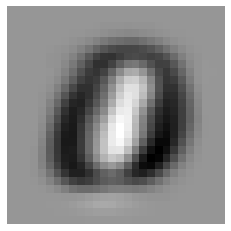

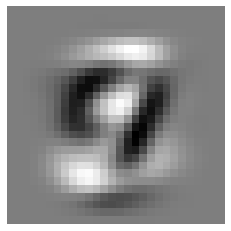

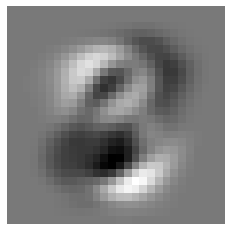

In [64]:
#eigennumbers = rnd_pca.components_.reshape((154,28,28))
#eigennumbers = rnd_pca.components_.reshape((169,28,28))
eigennumbers = rnd_pca.components_.reshape((4,28,28))
myNumber = eigennumbers[0]
print (len(myNumber))
myNumber=myNumber.reshape((28,28))
plt.imshow(myNumber, cmap = plt.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

myNumber = eigennumbers[1]
myNumber=myNumber.reshape((28,28))
plt.imshow(myNumber, cmap = plt.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

myNumber = eigennumbers[2]
myNumber=myNumber.reshape((28,28))
plt.imshow(myNumber, cmap = plt.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

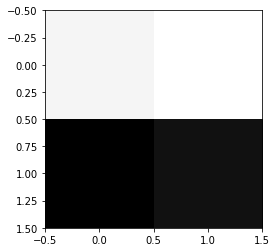

In [65]:
myNumber = X_reduced[0,:]
myNumber=myNumber.reshape((2,2))
plt.imshow(myNumber, cmap = plt.cm.binary,
           interpolation="nearest")
plt.show()

In [66]:
clf1 = LogisticRegression(solver='saga',
                        max_iter=10000)
clf1.fit(X_reduced, data[:, 0] )

LogisticRegression(max_iter=10000, solver='saga')

In [67]:
clf2 = LogisticRegression(solver='saga',
                        max_iter=10000)
clf2.fit(X_reduced2, data[:, 0] )

LogisticRegression(max_iter=10000, solver='saga')

In [68]:
clf3 = LogisticRegression(solver='saga',
                        max_iter=10000)
clf3.fit(X_reduced4, data[:, 0] )

LogisticRegression(max_iter=10000, solver='saga')

In [69]:
clf4 = LogisticRegression(solver='saga',
                        max_iter=10000)
clf4.fit(X_reduced8, data[:, 0] )

LogisticRegression(max_iter=10000, solver='saga')

In [70]:
clf5 = LogisticRegression(solver='saga',
                        max_iter=10000)
clf5.fit(X_reduced16, data[:, 0] )

LogisticRegression(max_iter=10000, solver='saga')

In [71]:
clf6 = LogisticRegression(solver='saga',
                        max_iter=10000)
clf6.fit(X_reduced32, data[:, 0] )

LogisticRegression(max_iter=10000, solver='saga')

In [72]:
predict = clf1.predict(X_reduced)
predict2 = clf2.predict(X_reduced2)
predict3 = clf3.predict(X_reduced4)
predict4 = clf4.predict(X_reduced8)
predict5 = clf5.predict(X_reduced16)
predict6 = clf6.predict(X_reduced32)

print("Accuracy = ", accuracy_score(predict, data[:, 0]))
print("Accuracy = ", accuracy_score(predict2, data[:, 0]))
print("Accuracy = ", accuracy_score(predict3, data[:, 0]))
print("Accuracy = ", accuracy_score(predict4, data[:, 0]))
print("Accuracy = ", accuracy_score(predict5, data[:, 0]))
print("Accuracy = ", accuracy_score(predict6, data[:, 0]))

Accuracy =  0.5606904761904762
Accuracy =  0.7867380952380952
Accuracy =  0.8660952380952381
Accuracy =  0.8967619047619048
Accuracy =  0.9140952380952381
Accuracy =  0.9253809523809524


In [73]:
mnistTest = pd.read_csv('https://github.com/LQDJerry/MachLearn/raw/main/data/test.zip')
test = mnistTest.values
XTest_reduced = rnd_pca32.transform(test)
print(XTest_reduced.shape)
predict = clf6.predict(XTest_reduced)

(28000, 160)


In [77]:
mnistTest.info()
mnistTest.index.name='ImageId'
mnistTest.index+=1
mnistTest['label']=predict


mnistTest['label'].to_csv('MNISTsub.csv', index=True, header=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 785 entries, pixel0 to label
dtypes: int64(785)
memory usage: 167.7 MB


This submition got a score of 91% on Kaggle. 

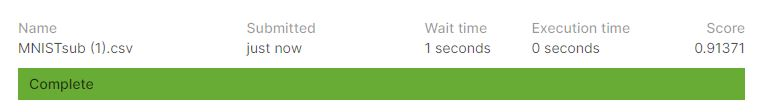